In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import data_classes as dc

In [3]:
import aux
inputpath = aux.COMMON_INPUT_PATH

In [4]:
ds = dc.Dataset.from_lhe_alp(inputpath+'inclusive/ma000300.lhe', event_num_max=100)

/home/ruth/Documents/samples/inclusive/ma000300.lhe read with [alp, top, antitop, muon, antimuon] in Events, where muons generated


In [5]:
ds

This Dataset contains 100 events.

In [6]:
ds.events[0]

Event: ['a', 't', '\x08ar{t}', '\\mu', '\x08ar{\\mu}']

In [7]:
ds.events[0].observable("track_from_ctau",[0,3],radius=100,ctau=1)

0

In [8]:
ds.events[0].counts([((lambda x: x>3), "track_from_ctau", [0,3], {'radius':100, 'ctau':1}), ((lambda x: abs(x)>0.5), "pseudorapidity", [0], {})])

False

In [9]:
ds.count_with_restrictions([((lambda x: x>3), "track_from_ctau", ["alp", "muon"], {'radius':100, 'ctau':1}), ((lambda x: abs(x)>0.5), "eta", ["alp"])])

0.1

In [25]:
ds.events[0][0]

Particle a with momentum FourVector: [60.617318292, -40.027558462, -37.319018058, 26.066352482]

In [26]:
ds.events[0][0].fourmomentum

FourVector: [60.617318292, -40.027558462, -37.319018058, 26.066352482]

In [28]:
ds.observables("track_from_ctau",["alp","muon"],100,1).mean()

10.438727409791186

In [36]:
l = [obs.abs_2d() for obs in ds.observables("decay_vertex",["alp"],1)]
il = [i for i in range(len(l)) if l[i]<100]
print(len(il))
print(il[1])

32
2


In [39]:
ev = ds.events[2]

In [40]:
ev

Event: ['a', 't', '\x08ar{t}', '\\mu', '\x08ar{\\mu}']

In [42]:
print(ev.particles[0])
print(ev.particles[3])

Particle a with momentum FourVector: [50.20390844, -14.823511027, -45.629816699, -14.782617209]
Particle \mu with momentum FourVector: [40.35824065938661, -11.890494439571034, -36.67464087366751, -11.931608617404114]


168.63564924831232
117.29123525690582


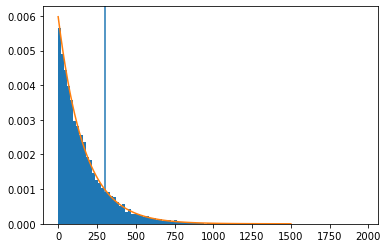

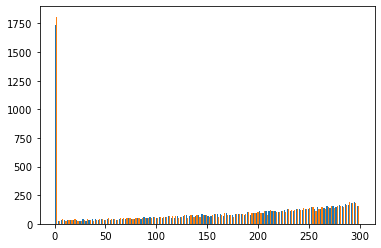

0.8302


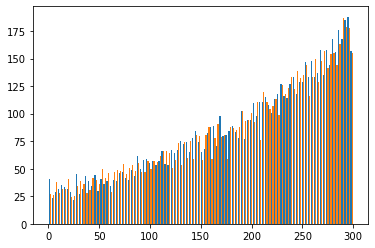

In [82]:
ctau = 1
n = 10000
rad = 300
dvl = []
trl = []
trl2 = []
for _ in range(n):
    dv = ev.particles[0].decay_vertex(ctau)
    dvl.append(dv.abs_3d())
    trl.append(ev[3].tracklength_to_radius(rad,dv))
    trl2.append(ev.track_from_ctau(0,3,rad,ctau))
print(np.mean(np.array(dvl)))
print(np.median(np.array(dvl)))
plt.hist(dvl,bins=100,density=True)
plt.axvline(rad)
xs = np.linspace(0,1500,100)
def exponential(x):
    return math.exp(-x/(ev.particles[0].boost()*ctau))/(ev.particles[0].boost()*ctau)
plt.plot(xs, [exponential(x) for x in xs])
plt.show()
plt.hist([trl,trl2],bins=100)
plt.show()
nonzerotrl = [tr for tr in trl if tr>0]
nonzerotrl2 = [tr for tr in trl2 if tr>0]
print(len(nonzerotrl)/n)
plt.hist([nonzerotrl,nonzerotrl2],bins=100)
plt.show()